# Part II - Prosper Loans Dataset - Explanatory Data Analysis

## by Sarah Lorenzen

## Dataset Overview and Executive Summary

### Objective
To explore and analyze borrower profiles, loan characteristics, and risk factors in Prosper’s peer-to-peer lending ecosystem, identifying key indicators that predict loan outcomes and inform risk-based decision-making.

### DataSet Overview
A curated subset of 13 variables was selected for exploratory data analysis, including:

- LoanStatus – loan outcome (i.e. Completed, Defaulted, Chargedoff)
- BorrowerRate – interest rate charged
- ProsperScore – internal credit risk score (1–10)
- CreditScoreRange – third-party estimated score ranges
- DebtToIncomeRatio, IncomeRange, LoanOriginalAmount, MonthlyLoanPayment
- Loan purpose via ListingCategory

### Key Findings

**1. Loan Outcome Distribution Shows Measurable Risk**

While most loans are "Current" or "Completed", a notable proportion have defaulted or been charged off, emphasizing the need for robust risk assessment.

**2. Interest Rates Are Tied to Borrower Risk**

Borrowers with lower ProsperScores or lower credit scores are charged significantly higher interest rates, reflecting higher perceived risk.

**3. Credit Health and Debt To Income Impact Loan Performance**

Loans associated with low credit scores and high debt-to-income ratios have higher default rates.

**4. Loan Purpose Affects Risk Levels**

Categories such as "Debt Consolidation" dominate volume, but riskier categories like "Business" or "Medical" show a higher incidence of default.

**5. Loan Terms Influence Monthly Burden**

Longer-term loans (60 months) are associated with higher loan amounts and monthly payments, which may impact repayment capability.

**6. Income Range Correlates with Loan Conditions**

Higher-income borrowers typically receive better interest rates and higher loan amounts, confirming income as a key credit factor.

### Strategic Implications

For Peer Lenders: Risk-adjusted lending should consider ProsperScore, credit metrics, and loan purpose as primary filters.

For Prosper: Optimize automated lending decision systems using historic default trends by borrower profile.

### Conclusion

The Prosper loan data reveals how credit risk (via ProsperScore, CreditScoreRange, DebtToIncomeRatio) correlates with the terms and costs of loans (e.g., BorrowerRate, MonthlyLoanPayment). We also observe how loan status outcomes depend on borrower characteristics, with high-risk individuals more likely to default. These insights can guide better loan underwriting or investment decisions.

Data-driven strategies can significantly improve the effectiveness of peer-to-peer lending from both lender and platform perspectives.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the clean master dataset into a pandas dataframe

df = pd.read_csv('prosperloans_clean_master.csv')

## Visualization 1: Loan Status Distribution

This chart shows the overall health of the loan portfolio. A large number of "Completed" loans suggests repayment success, while a noticeable portion of "Chargedoff" or "Defaulted" loans highlights investment risk.

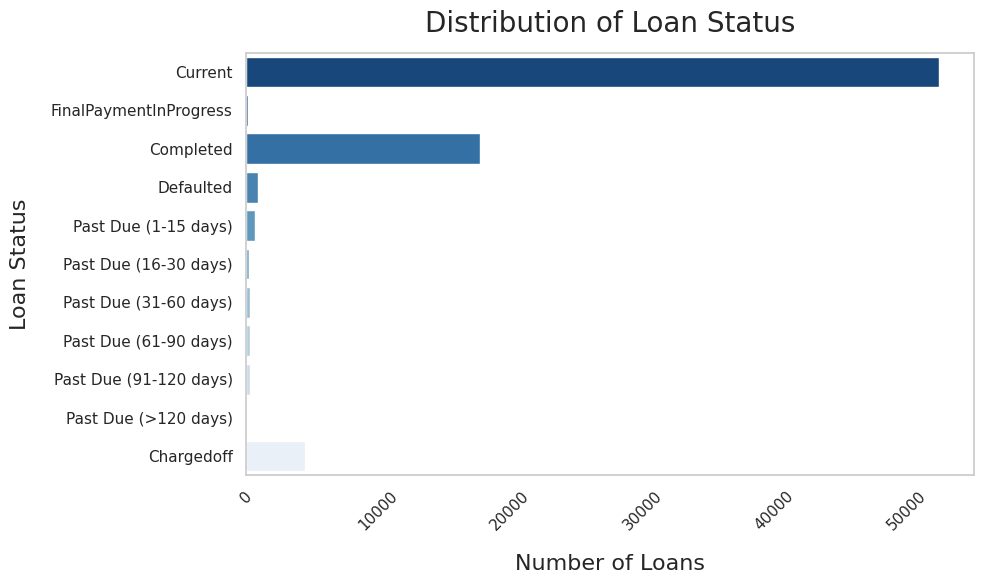

In [7]:
# Set visual theme
sns.set(style="whitegrid")

# Order income range logically
status_order = [
    "Current", "FinalPaymentInProgress", "Completed", "Defaulted", "Past Due (1-15 days)", "Past Due (16-30 days)",
    "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Chargedoff"
]


plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='LoanStatus', order=status_order, palette='Blues_r')
plt.title('Distribution of Loan Status', fontsize=20, pad=15)
plt.xlabel('Number of Loans', fontsize=16, labelpad=15)
plt.ylabel('Loan Status', fontsize=16, labelpad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

## Visualization 2: Loan Status by Credit Score Range

Credit Score is directly related to Loan Status. The higher the Credit Score, the more positive the outcome of the loan: Current, Completed or Final Payment in Progress. The Lower Credit Score ranges have a higher prevalence of the negative loan statuses: Charged Off, Defaulted, Past Due. This is expected behavior as to attain a higher credit score, you must be financially responsible and pay your debts on time.

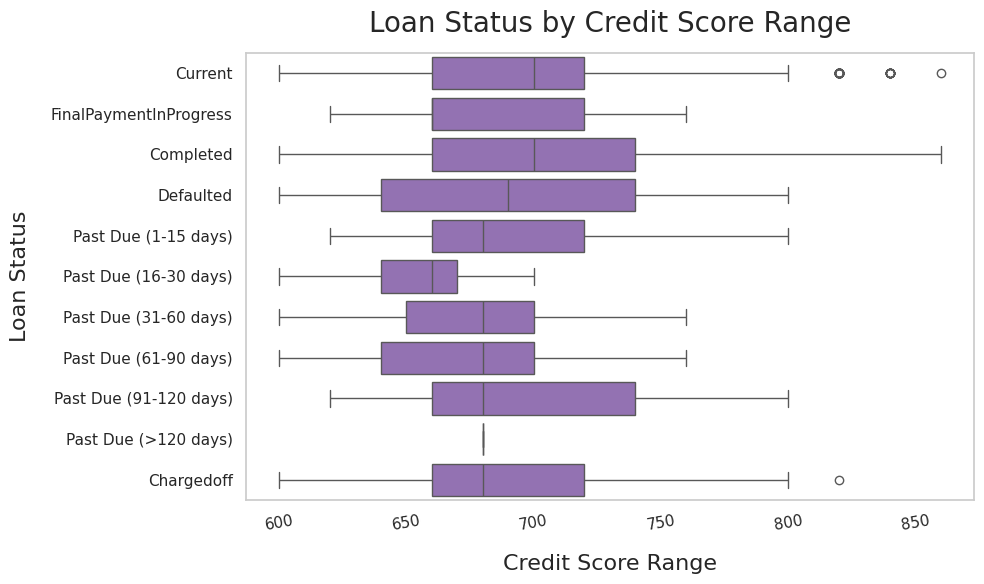

In [8]:
# Sample size of 5000
samples = np.random.choice(df.shape[0], 5000, replace = False)
loans_samp = df.iloc[samples,:]

# Set visual theme
sns.set(style="whitegrid")

# Order income range logically
status_order = [
    "Current", "FinalPaymentInProgress", "Completed", "Defaulted", "Past Due (1-15 days)", "Past Due (16-30 days)",
    "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Chargedoff"
]

plt.figure(figsize=[10, 6])
sns.boxplot(data=loans_samp, x='CreditScoreRangeLower', y='LoanStatus', order=status_order, color='tab:purple')
plt.xticks(rotation=10);
plt.title('Loan Status by Credit Score Range', fontsize=20, pad=15)
plt.xlabel('Credit Score Range', fontsize=16, labelpad=15)
plt.ylabel('Loan Status', fontsize=16, labelpad=15)
plt.tight_layout()
plt.grid(False)
plt.show()


## Visualization 3: Monthly Loan Payment vs Loan Amount by Term

Shorter terms result in higher monthly payments for the same loan amount. This can affect affordability and default risk.

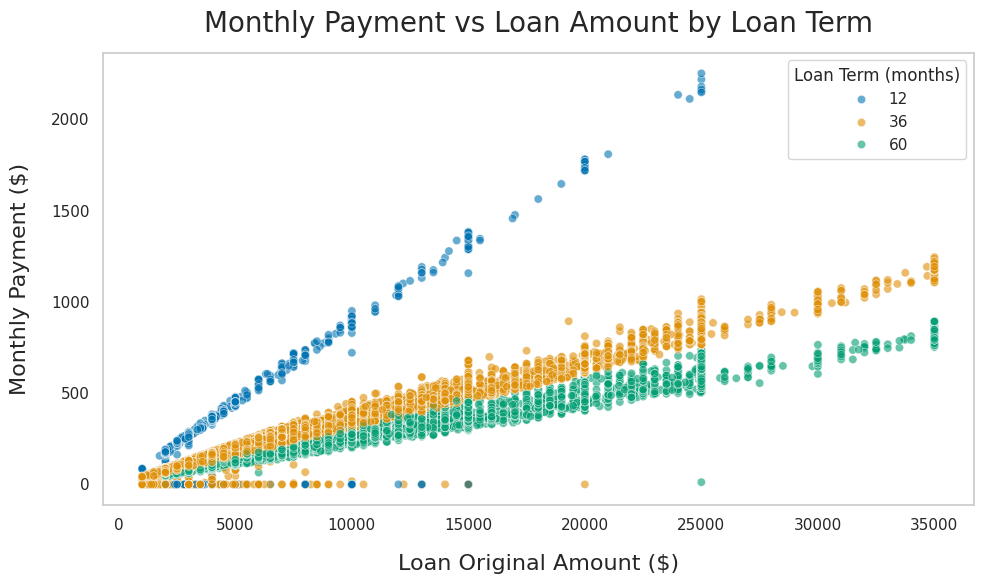

In [5]:
# Set visual theme
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='LoanOriginalAmount', 
    y='MonthlyLoanPayment', 
    hue='Term', 
    palette='colorblind', 
    alpha=0.6
)
plt.title('Monthly Payment vs Loan Amount by Loan Term', fontsize=20, pad=15)
plt.xlabel('Loan Original Amount ($)', fontsize=16, labelpad=15)
plt.ylabel('Monthly Payment ($)', fontsize=16, labelpad=15)
plt.legend(title='Loan Term (months)')
plt.tight_layout()
plt.grid(False)
plt.show()
